In [2]:
with open('odia.txt') as f:
    lines = f.readlines()
    #split the words in each line by 1st tab
    with open('phonemes_odia.txt', 'w') as f:
        for line in lines:
            words = line.split('\t', 1)
            #remove all newlines from word[1]
            words[1] = words[1].replace('\n', '')
            #add words[1] to a new file with name phonemes_telugu.txt
                #if word[1] first character is a space then remove it
            if words[1][0] == ' ':
                f.write(words[1][1:] + '\n')
            else:
                f.write(words[1] + '\n')

In [4]:
#  create array of words for each sentence
sentences = []
with open ('phonemes_odia.txt') as f:
    lines = f.readlines()
    #split the words in each line by 1st space
    for line in lines:
        words = line.split(' ')
        # trim \n and spaces from last word
        words[-1] = words[-1].replace('\n', '')
        sentences.append(words)
# print(sentences)

In [5]:
# train a gensim word2vec model with sentences array
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
# save the model
model.save('odia_phoneme2vec.model')

Word2Vec<vocab=52, vector_size=100, alpha=0.025>
['i', 'aa', 'ax', 'u', 'r', 'a', 'e', 'k', 'b', 'n', 'p', 'l', 'h', 's', 'm', 't', 'ch', 'j', 'd', 'tx', 'c', 'g', 'o', 'kh', 'nx', 'dx', 'lx', 'sh', 'mq', 'th', 'txh', 'y', 'dxq', 'ii', 'bh', 'sx', 'dh', 'ph', 'ng', 'w', 'N', 'gh', 'jh', 'nj', 'uu', 'rq', 'dxh', 'dxhq', 'au', 'ai', 'hq', 'jq']


In [6]:
#get similarity between all pairs of words
for i in range(len(words)):
    for j in range(i+1, len(words)):
        l = (words[i], words[j], model.wv.similarity(words[i], words[j]))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

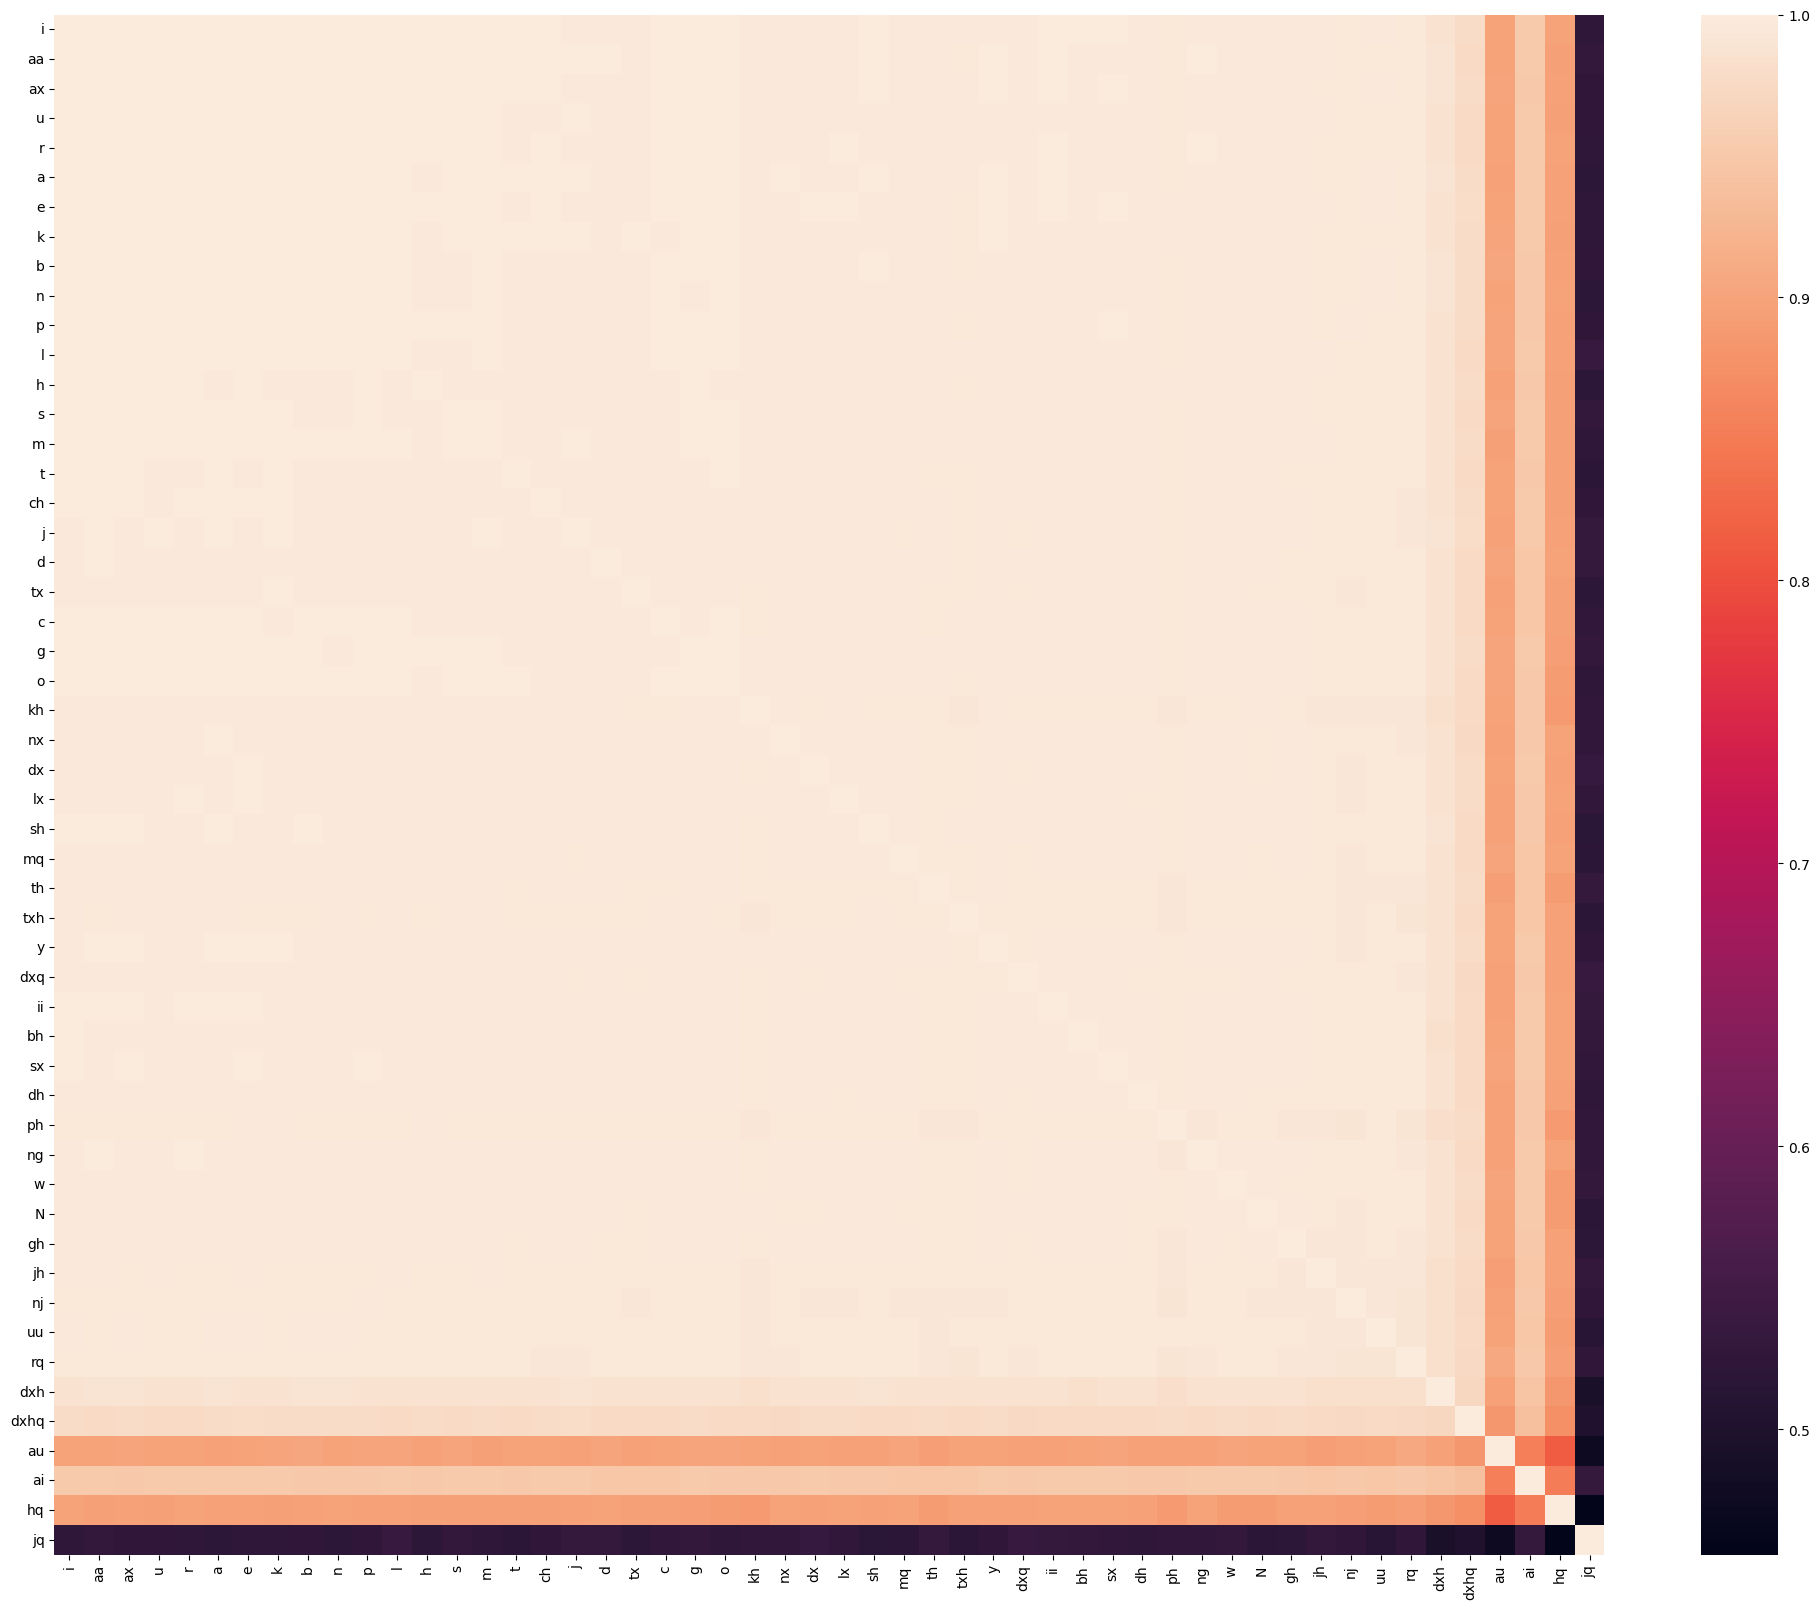

In [8]:
# heat map of similarity between all pairs of words
# create a matrix of zeros
matrix = np.zeros((len(words), len(words)))
# fill the matrix with similarity values
for i in range(len(words)):
    for j in range(0, len(words)):
        matrix[i][j] = model.wv.similarity(words[i], words[j])
# create a heatmap
sns.heatmap(matrix, xticklabels=words, yticklabels=words)
#increase the size of the plot
plt.gcf().set_size_inches(25, 20)
plt.show()